# ***Screen Time Analysis***

Importing the necessary libraries

In [12]:
install.packages("readr")

# Load the readr package
library(readr)

# After uploading, read the CSV file (adjust the file name if necessary)
data <- read_csv("/content/screentime_analysis (1).csv")

# Display the first few rows of the data
head(data)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): App
dbl  (3): Usage (minutes), Notifications, Times Opened
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,App,Usage (minutes),Notifications,Times Opened
<date>,<chr>,<dbl>,<dbl>,<dbl>
2024-08-07,Instagram,81,24,57
2024-08-08,Instagram,90,30,53
2024-08-26,Instagram,112,33,17
2024-08-22,Instagram,82,11,38
2024-08-12,Instagram,59,47,16
2024-08-28,Instagram,50,42,26


Summary statistics

In [13]:
# Summary statistics of the data
summary(data)


      Date                App            Usage (minutes)  Notifications   
 Min.   :2024-08-01   Length:200         Min.   :  1.00   Min.   :  0.00  
 1st Qu.:2024-08-09   Class :character   1st Qu.: 17.00   1st Qu.:  1.75  
 Median :2024-08-18   Mode  :character   Median : 26.00   Median : 11.50  
 Mean   :2024-08-16                      Mean   : 37.75   Mean   : 28.73  
 3rd Qu.:2024-08-25                      3rd Qu.: 51.25   3rd Qu.: 47.00  
 Max.   :2024-08-30                      Max.   :119.00   Max.   :147.00  
  Times Opened  
 Min.   : 1.00  
 1st Qu.: 4.00  
 Median :10.00  
 Mean   :21.63  
 3rd Qu.:32.00  
 Max.   :99.00  

Analyzing the screen time trends of all the apps

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Rows: 200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): App
dbl  (3): Usage (minutes), Notifications, Times Opened
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


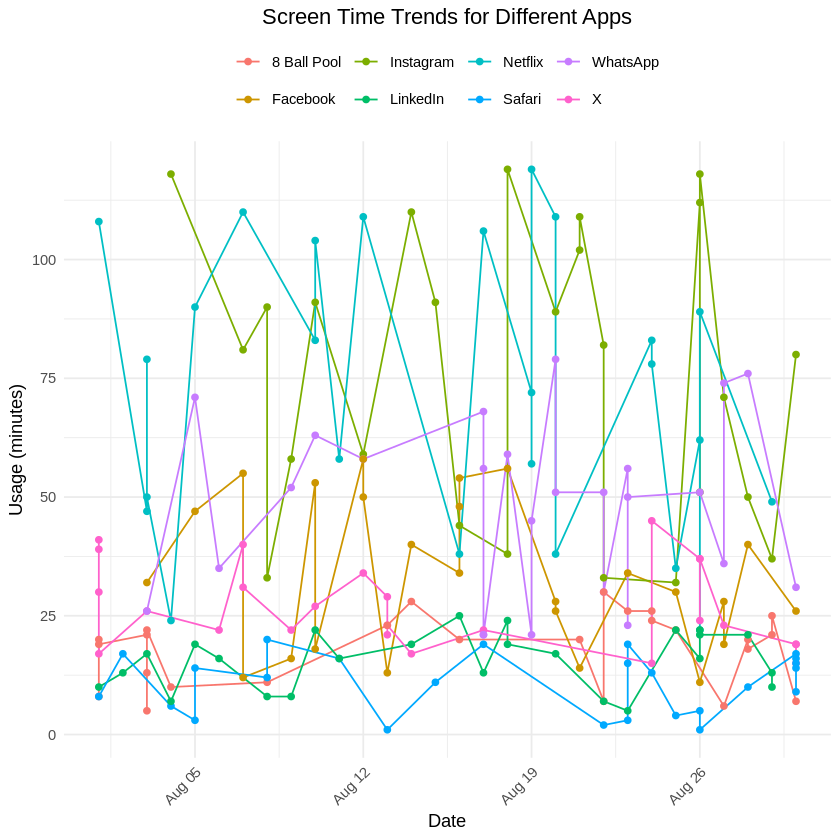

In [14]:
install.packages("readr")
install.packages("ggplot2")
install.packages("lubridate")

# Load required libraries
library(readr)
library(ggplot2)
library(lubridate)

# read the CSV file
data <- read_csv("/content/screentime_analysis (1).csv")

# Convert the 'Date' column to Date format
data$Date <- ymd(data$Date)

# Create the plot
ggplot(data, aes(x = Date, y = `Usage (minutes)`, color = App, group = App)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Screen Time Trends for Different Apps",
    x = "Date",
    y = "Usage (minutes)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(legend.title = element_blank()) +
  theme(legend.position = "top") +
  theme(plot.title = element_text(hjust = 0.5)) # Center the title


 Relationship between Screen time, Notifications and Times opened

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Rows: 200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): App
dbl  (3): Usage (minutes), Notifications, Times Opened
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


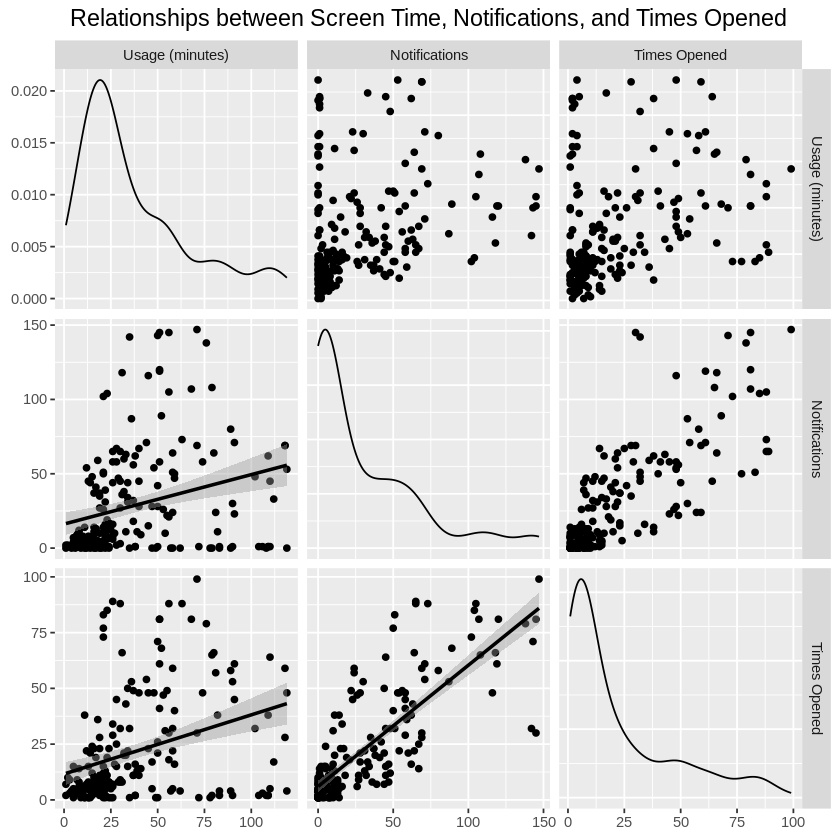

In [15]:
install.packages("readr")
install.packages("GGally")

# Load required libraries
library(readr)
library(GGally)

# read the CSV file
data <- read_csv("/content/screentime_analysis (1).csv")

# Select relevant columns
data_subset <- data[, c("Usage (minutes)", "Notifications", "Times Opened")]

# Create a pair plot
pairplot <- ggpairs(
  data_subset,
  upper = list(continuous = "points"),   # Scatter plots for upper triangle
  lower = list(continuous = "smooth"),   # Smoothed plots for lower triangle
  diag = list(continuous = "densityDiag") # KDE on diagonal
)

# Add a title
pairplot + ggtitle("Relationships between Screen Time, Notifications, and Times Opened") +
  theme(plot.title = element_text(hjust = 0.5, size = 14)) # Center and style the title


 Top apps based on average usage, notifications, and times opened per app

In [17]:
install.packages("readr")
install.packages("dplyr")

# Load required libraries
library(readr)
library(dplyr)

# Read the CSV file
data <- read_csv("/content/screentime_analysis (1).csv")

# Group by App and calculate averages
app_analysis <- data %>%
  group_by(App) %>%
  summarise(
    avg_usage = mean(`Usage (minutes)`, na.rm = TRUE),
    avg_notifications = mean(Notifications, na.rm = TRUE),
    avg_times_opened = mean(`Times Opened`, na.rm = TRUE)
  ) %>%
  arrange(desc(avg_usage))

# View the result
print(app_analysis)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): App
dbl  (3): Usage (minutes), Notifications, Times Opened
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 8 × 4
  App         avg_usage avg_notifications avg_times_opened
  <chr>           <dbl>             <dbl>            <dbl>
1 Instagram        75.9             49.8             41.6 
2 Netflix          72.8              0.44             2.56
3 WhatsApp         48.2             99.9             68.2 
4 Facebook         33.7             39.7             30.2 
5 X                27               25.8             13.2 
6 8 Ball Pool      18.1              4.52             7.28
7 LinkedIn         15.6              8.92             4.76
8 Safari           10.8              0.72             5.28


Average screen time of the user by day of the week

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): App
dbl  (3): Usage (minutes), Notifications, Times Opened
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


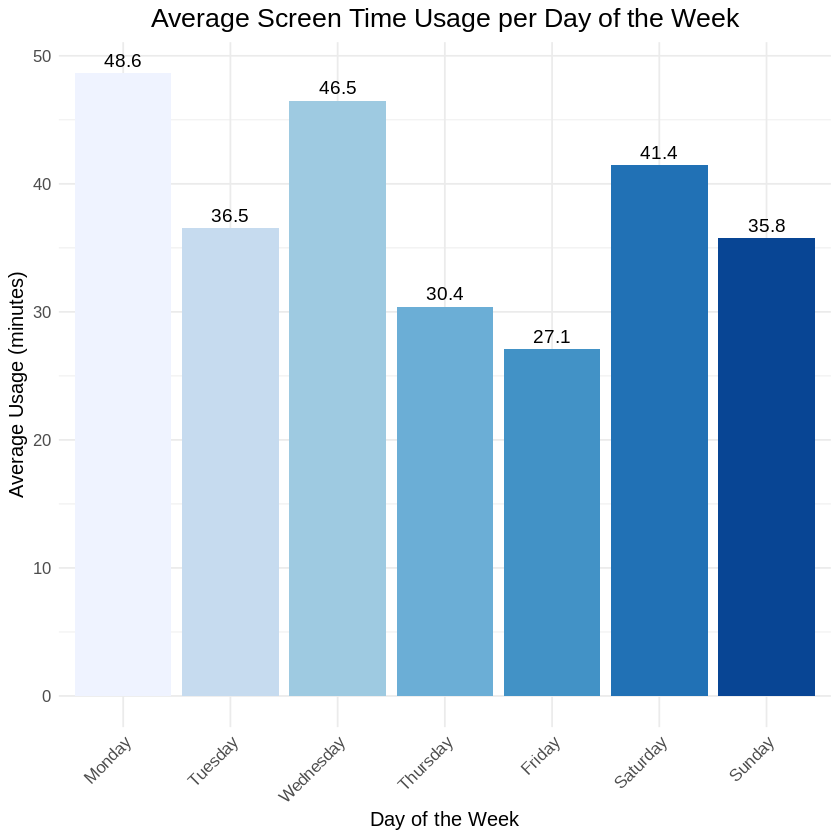

In [19]:
install.packages("readr")
install.packages("ggplot2")
install.packages("lubridate")
install.packages("dplyr")
install.packages("RColorBrewer")

# Load libraries
library(readr)
library(ggplot2)
library(lubridate)
library(dplyr)
library(RColorBrewer)

# Read the CSV file
data <- read_csv("/content/screentime_analysis (1).csv")

# Convert Date column to Date type
data$Date <- ymd(data$Date)

# Add day of week column
data$`Day of Week` <- wday(data$Date, label = TRUE, abbr = FALSE)

# Order the days (Monday to Sunday)
data$`Day of Week` <- factor(data$`Day of Week`,
                             levels = c("Monday", "Tuesday", "Wednesday",
                                        "Thursday", "Friday", "Saturday", "Sunday"))

# Calculate average usage per day
weekly_usage <- data %>%
  group_by(`Day of Week`) %>%
  summarise(avg_usage = mean(`Usage (minutes)`, na.rm = TRUE))

# Plot with different shades of blue
ggplot(weekly_usage, aes(x = `Day of Week`, y = avg_usage, fill = `Day of Week`)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = round(avg_usage, 1)), vjust = -0.5, size = 4) +
  scale_fill_brewer(palette = "Blues") +  # Use a palette of blue shades
  labs(
    title = "Average Screen Time Usage per Day of the Week",
    x = "Day of the Week",
    y = "Average Usage (minutes)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, hjust = 0.5),
    axis.title = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
    axis.text.y = element_text(size = 10),
    legend.position = "none"  # Hide legend since bars are already labeled
  )


Average Daily Usage for Instagram, Netflix, and WhatsApp

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): App
dbl  (3): Usage (minutes), Notifications, Times Opened
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'App'. You can override using the `.groups`
argument.


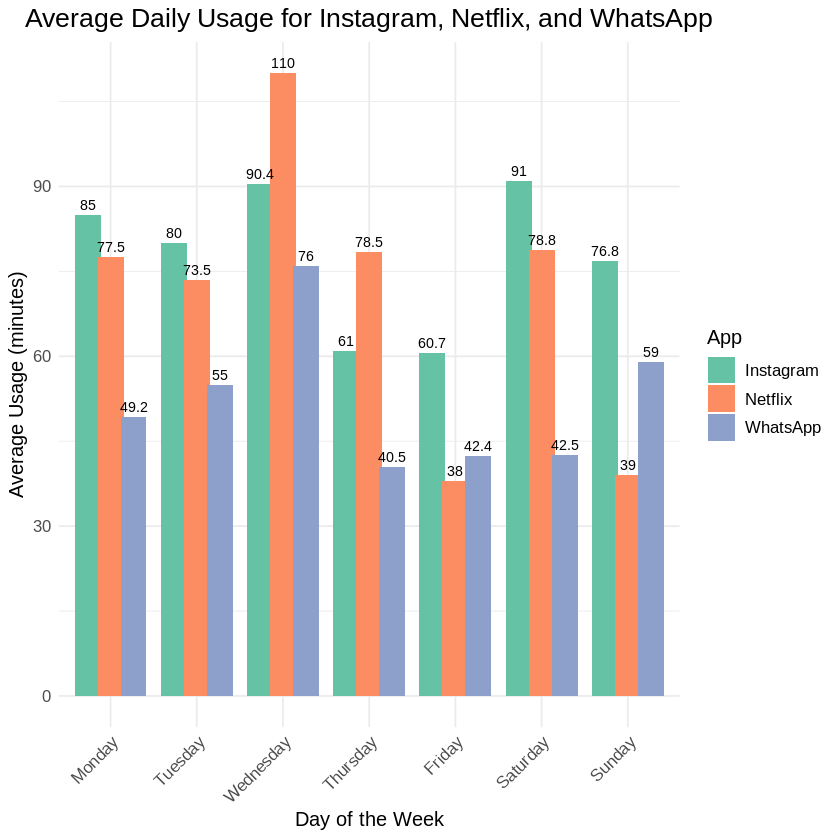

In [20]:
install.packages("readr")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("lubridate")
install.packages("tidyr")

# Load libraries
library(readr)
library(ggplot2)
library(dplyr)
library(lubridate)
library(tidyr)

# Read the CSV file
data <- read_csv("/content/screentime_analysis (1).csv")

# Convert Date column to proper date format
data$Date <- ymd(data$Date)

# Add 'Day of Week' column
data$`Day of Week` <- wday(data$Date, label = TRUE, abbr = FALSE)

# Ensure days are in correct order
day_order <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
data$`Day of Week` <- factor(data$`Day of Week`, levels = day_order)

# Filter for top apps
top_apps <- c("Instagram", "Netflix", "WhatsApp")
top_apps_data <- data %>% filter(App %in% top_apps)

# Compute average usage grouped by App and Day of Week
daily_app_usage <- top_apps_data %>%
  group_by(App, `Day of Week`) %>%
  summarise(`Usage (minutes)` = mean(`Usage (minutes)`, na.rm = TRUE)) %>%
  ungroup()

# Ensure all combinations of App and Day of Week exist (fill missing with 0)
daily_app_usage <- complete(daily_app_usage, App, `Day of Week`, fill = list(`Usage (minutes)` = 0))

# Plot the grouped bar chart
ggplot(daily_app_usage, aes(x = `Day of Week`, y = `Usage (minutes)`, fill = App)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  geom_text(aes(label = round(`Usage (minutes)`, 1)),
            position = position_dodge(width = 0.8),
            vjust = -0.5, size = 3) +
  scale_fill_brewer(palette = "Set2") +
  labs(
    title = "Average Daily Usage for Instagram, Netflix, and WhatsApp",
    x = "Day of the Week",
    y = "Average Usage (minutes)",
    fill = "App"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, hjust = 0.5),
    axis.title = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
    axis.text.y = element_text(size = 10),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )


App Probability of Open with Notification

In [21]:
install.packages("readr")
install.packages("dplyr")

# Load libraries
library(readr)
library(dplyr)

# Read the CSV
data <- read_csv("/content/screentime_analysis (1).csv")

# Filter rows where Notifications > 0
notifications_data <- data %>% filter(Notifications > 0)

# Calculate probability that the app was opened when a notification was received
app_opened_when_notif <- notifications_data %>%
  group_by(App) %>%
  summarise(`Probability of Open with Notification` = mean(`Times Opened` > 0, na.rm = TRUE)) %>%
  ungroup()

# View the result
print(app_opened_when_notif)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): App
dbl  (3): Usage (minutes), Notifications, Times Opened
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 8 × 2
  App         `Probability of Open with Notification`
  <chr>                                         <dbl>
1 8 Ball Pool                                       1
2 Facebook                                          1
3 Instagram                                         1
4 LinkedIn                                          1
5 Netflix                                           1
6 Safari                                            1
7 WhatsApp                                          1
8 X                                                 1
